In [11]:
from authentication_endpoints import authentication_endpoints
#first arguement is my api key then the second is the file path to my private key. Everyone's file path will be different!
#authentication_endpoints inherits from no_authentication_endpoints class so any method in N.A.E. you can call from A.E
#this authentication is needed to submit orders, cancels order,etc
#if this you only care about getting data look at cell below
ae = authentication_endpoints('6336f863-f0fe-4935-86b9-0748ded38928',r'C:\Users\bandr\OneDrive\Desktop\Kalshi\kalshi-key.key')
data= ae.candle_sticks_in_pandas('KXCBDECISIONCANADA', 'KXCBDECISIONCANADA-25OCT-C25',60)
#this one gets the your portfolio balance
print('portfolio balance: '+ ae.get_portfolio_balance())
data.tail()


portfolio balance: 35.00


,end_period_dt,open_interest,volume,price_close,price_close_dollars,price_high,price_high_dollars,price_low,price_low_dollars,price_max,...,yes_ask_open_dollars,yes_bid_close,yes_bid_close_dollars,yes_bid_high,yes_bid_high_dollars,yes_bid_low,yes_bid_low_dollars,yes_bid_open,yes_bid_open_dollars,end_period_ts
451,2025-10-27 23:00:00,4769,20,91.0,0.9100,91.0,0.9100,91.0,0.9100,None,...,0.9400,91,0.9100,91,0.9100,90,0.9000,91,0.9100,1761606000
452,2025-10-28 00:00:00,4769,0,NaN,None,NaN,None,NaN,None,None,...,0.9400,90,0.9000,91,0.9100,88,0.8800,91,0.9100,1761609600
453,2025-10-28 01:00:00,4769,0,NaN,None,NaN,None,NaN,None,None,...,0.9400,90,0.9000,90,0.9000,88,0.8800,90,0.9000,1761613200
454,2025-10-28 02:00:00,4769,0,NaN,None,NaN,None,NaN,None,None,...,0.9400,90,0.9000,90,0.9000,88,0.8800,90,0.9000,1761616800
455,2025-10-28 03:00:00,4769,0,NaN,None,NaN,None,NaN,None,None,...,0.9400,90,0.9000,90,0.9000,88,0.8800,90,0.9000,1761620400


In [1]:
#much simpler way to access the non authentication data points 
from no_authentication_endpoints import no_authentication_endpoints
nae = no_authentication_endpoints()
df = nae.candle_sticks_in_pandas('KXDEMSWEEP', 'KXDEMSWEEP-25NOV04',1440)
df.head()


,end_period_dt,open_interest,volume,price_close,price_close_dollars,price_high,price_high_dollars,price_low,price_low_dollars,price_max,...,yes_ask_open_dollars,yes_bid_close,yes_bid_close_dollars,yes_bid_high,yes_bid_high_dollars,yes_bid_low,yes_bid_low_dollars,yes_bid_open,yes_bid_open_dollars,end_period_ts
0,2025-09-18 04:00:00,4892,5275,80,0.8000,86,0.8600,76,0.7600,None,...,1.0000,80,0.8000,82,0.8200,3,0.0300,76,0.7600,1758168000
1,2025-09-19 04:00:00,15108,11324,81,0.8100,84,0.8400,75,0.7500,None,...,0.8400,79,0.7900,83,0.8300,63,0.6300,80,0.8000,1758254400
2,2025-09-20 04:00:00,18405,4861,77,0.7700,82,0.8200,76,0.7600,None,...,0.8100,77,0.7700,81,0.8100,76,0.7600,79,0.7900,1758340800
3,2025-09-21 04:00:00,21047,4363,79,0.7900,83,0.8300,77,0.7700,None,...,0.8000,79,0.7900,81,0.8100,77,0.7700,77,0.7700,1758427200
4,2025-09-22 04:00:00,24233,4129,82,0.8200,84,0.8400,78,0.7800,None,...,0.8300,82,0.8200,82,0.8200,78,0.7800,79,0.7900,1758513600


In [2]:
import numpy as np #get log returns for a contract
returns = np.log(df['yes_bid_close']/ df['yes_bid_close'].shift(1)).dropna()


Sharpe Ratio: 0.027181211148508203


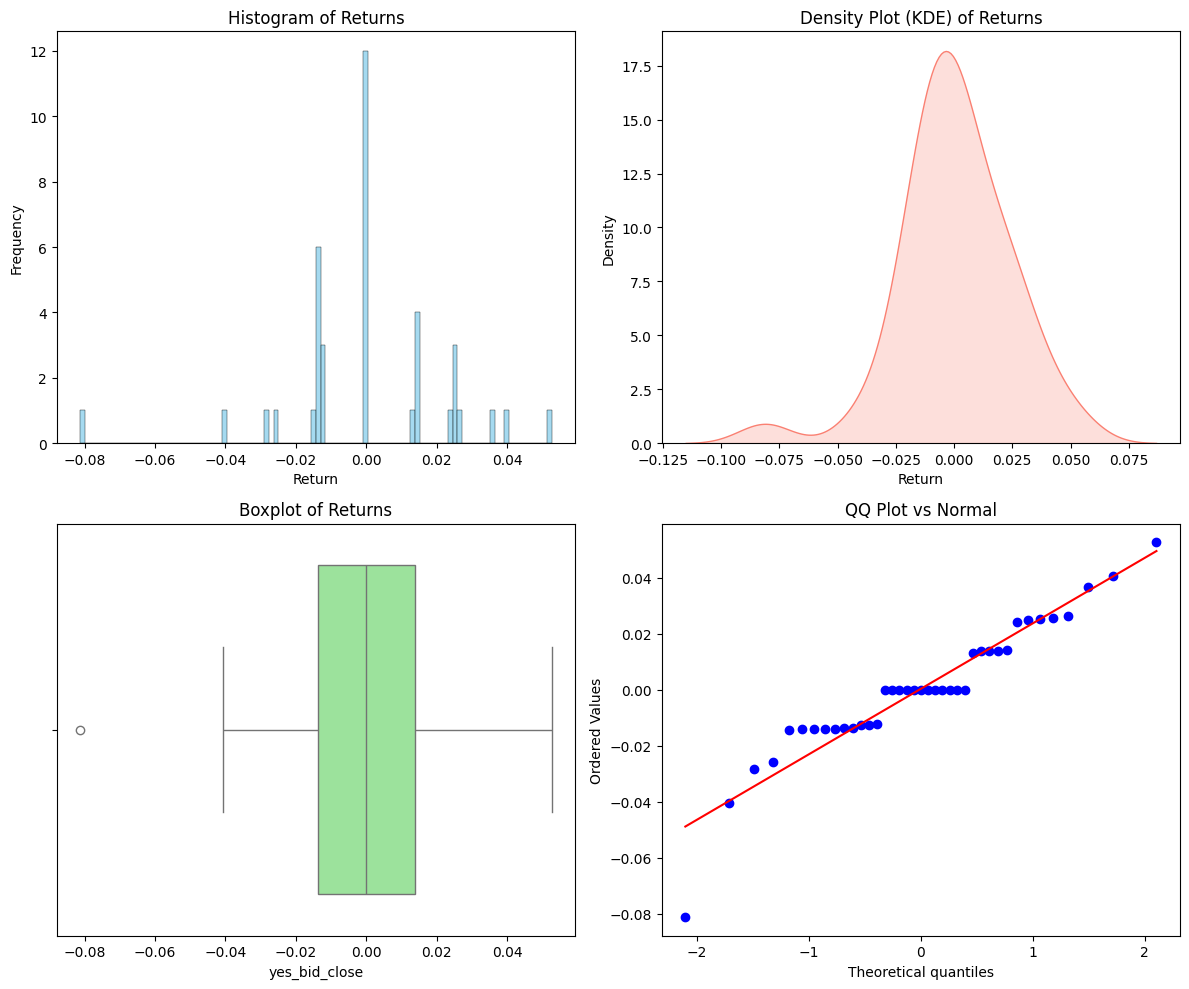

In [3]:
from useful_tools import useful_tools
ut = useful_tools() #visualize the returns
print(f'Sharpe Ratio: {ut.sharpe_ratio(returns)}')
ut.visualize_returns(returns, True)